In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-development-indicators/Indicators.csv
/kaggle/input/world-development-indicators/hashes.txt
/kaggle/input/world-development-indicators/CountryNotes.csv
/kaggle/input/world-development-indicators/SeriesNotes.csv
/kaggle/input/world-development-indicators/Country.csv
/kaggle/input/world-development-indicators/Series.csv
/kaggle/input/world-development-indicators/database.sqlite
/kaggle/input/world-development-indicators/Footnotes.csv


In [65]:
#Referenced https://www.kaggle.com/anggidwifiani/world-development-1960-2015
#Referenced https://www.kaggle.com/mariapushkareva/world-development-indicators-with-sql
#Referenced https://www.kaggle.com/kareena11/comparison-china-india-and-south-korea

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import sqlite3
from sklearn.linear_model import LinearRegression

In [14]:
connect = sqlite3.connect('/kaggle/input/world-development-indicators/database.sqlite')

In [15]:
data = pd.read_sql("""SELECT * FROM sqlite_master WHERE type = 'table';""", connect)

In [16]:
data = pd.read_sql("""SELECT * FROM Indicators;""", connect)

In [17]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [18]:
#data = pd.read_sql("""SELECT * FROM Indicators WHERE Year BETWEEN 1990 AND 2012""", connect)

In [19]:
#data.head()

In [20]:
data = pd.read_sql("""SELECT * FROM Indicators WHERE Year BETWEEN 1990 AND 2012 AND IndicatorCode IN ('EN.ATM.CO2E.PC')""", connect)

In [21]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1990,3.203907
1,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1990,5.367886
2,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1990,8.847908
3,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1990,2.600991
4,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1990,1.803359


In [22]:
data.shape

(4929, 6)

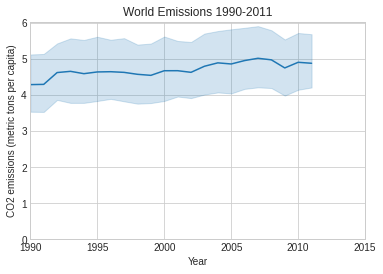

In [64]:
#World
emissions = pd.read_sql("""SELECT * FROM Indicators WHERE Year BETWEEN 1990 AND 2011 AND IndicatorCode IN ('EN.ATM.CO2E.PC')""", connect)
sns.lineplot(data = emissions, x = 'Year', y = 'Value')
plt.xlim(1990, 2015)
plt.ylim(0, None)
plt.title('World Emissions 1990-2011')
plt.xlabel('Year')
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.show()

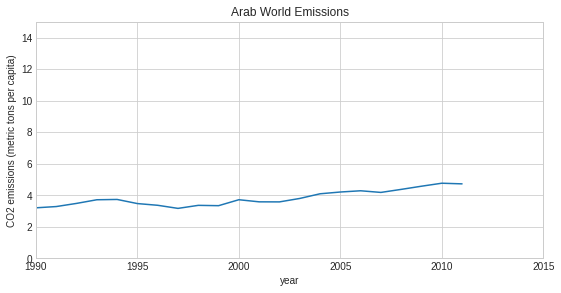

In [51]:
#ARB
plt.figure(figsize = (20,20))
plt.subplot(4,2,1)
Arab_World = pd.read_sql("""SELECT * FROM Indicators WHERE Year BETWEEN 1990 AND 2011 AND IndicatorCode IN ('EN.ATM.CO2E.PC') AND CountryCode IN ('ARB')""", connect)
sns.lineplot(data = Arab_World, x = 'Year', y = 'Value')
plt.title('Arab World Emissions')
plt.xlabel('year')
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.xlim(1990, 2015)
plt.ylim(0, 15)
plt.show()

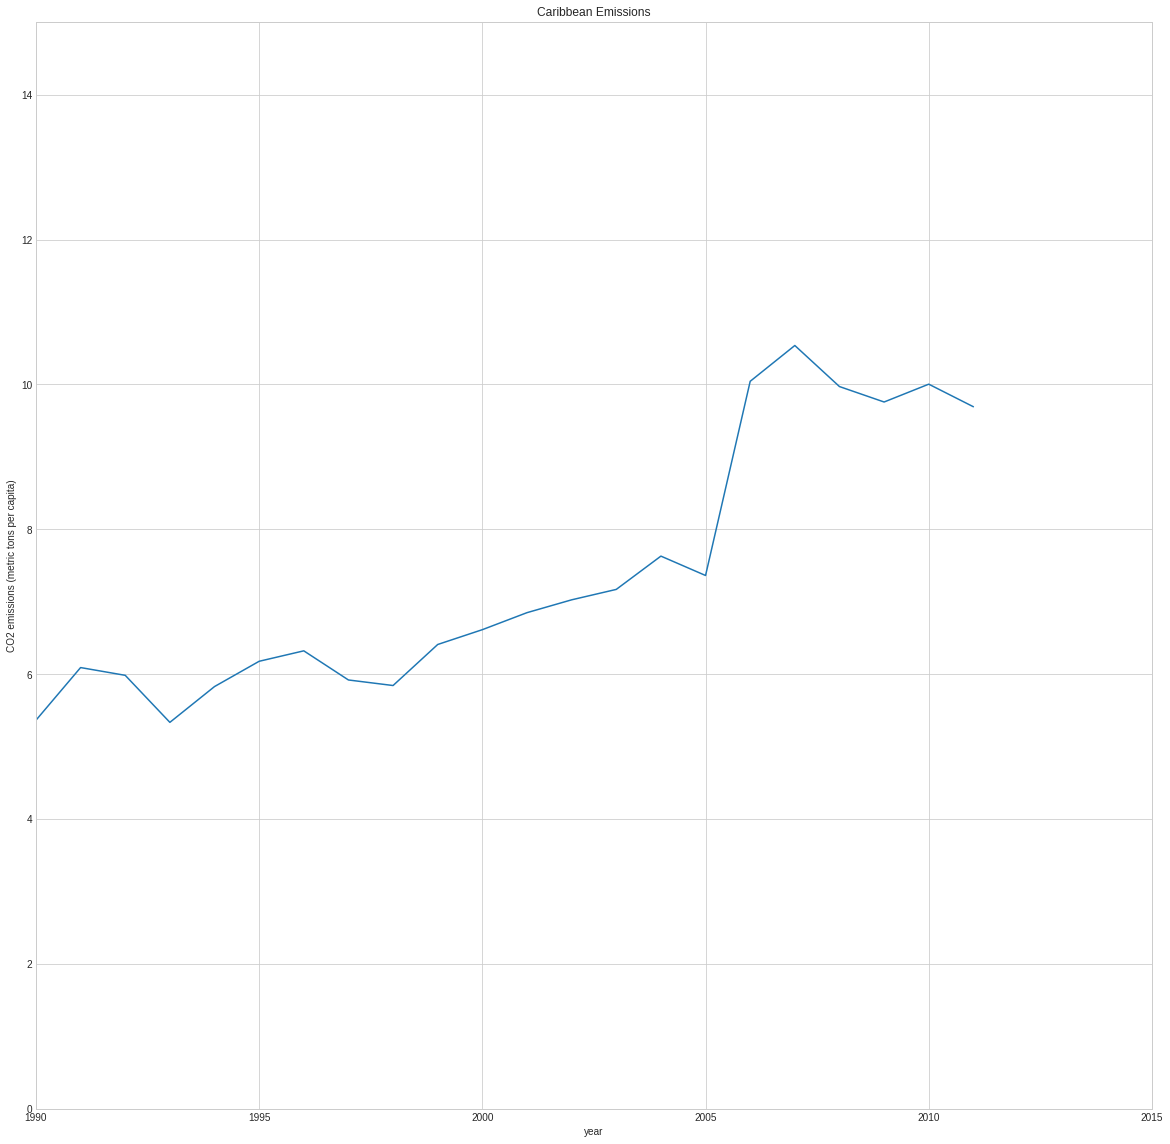

In [52]:
#might help with plot sizing https://stackoverflow.com/questions/15858192/how-to-set-xlim-and-ylim-for-a-subplot-in-matplotlib

#CSS
#plt.figure(figsize = (20,10))
#plt.subplot(4,2,2)
plt.figure(figsize = (20,20))
Caribbean = pd.read_sql("""SELECT * FROM Indicators WHERE Year BETWEEN 1990 AND 2011 AND IndicatorCode IN ('EN.ATM.CO2E.PC') AND CountryCode IN ('CSS');""", connect)
sns.lineplot(data = Caribbean, x = 'Year', y = 'Value')
plt.title('Caribbean Emissions')
plt.xlabel('year')
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.xlim(1990, 2015)
plt.ylim(0, 15)
plt.show()

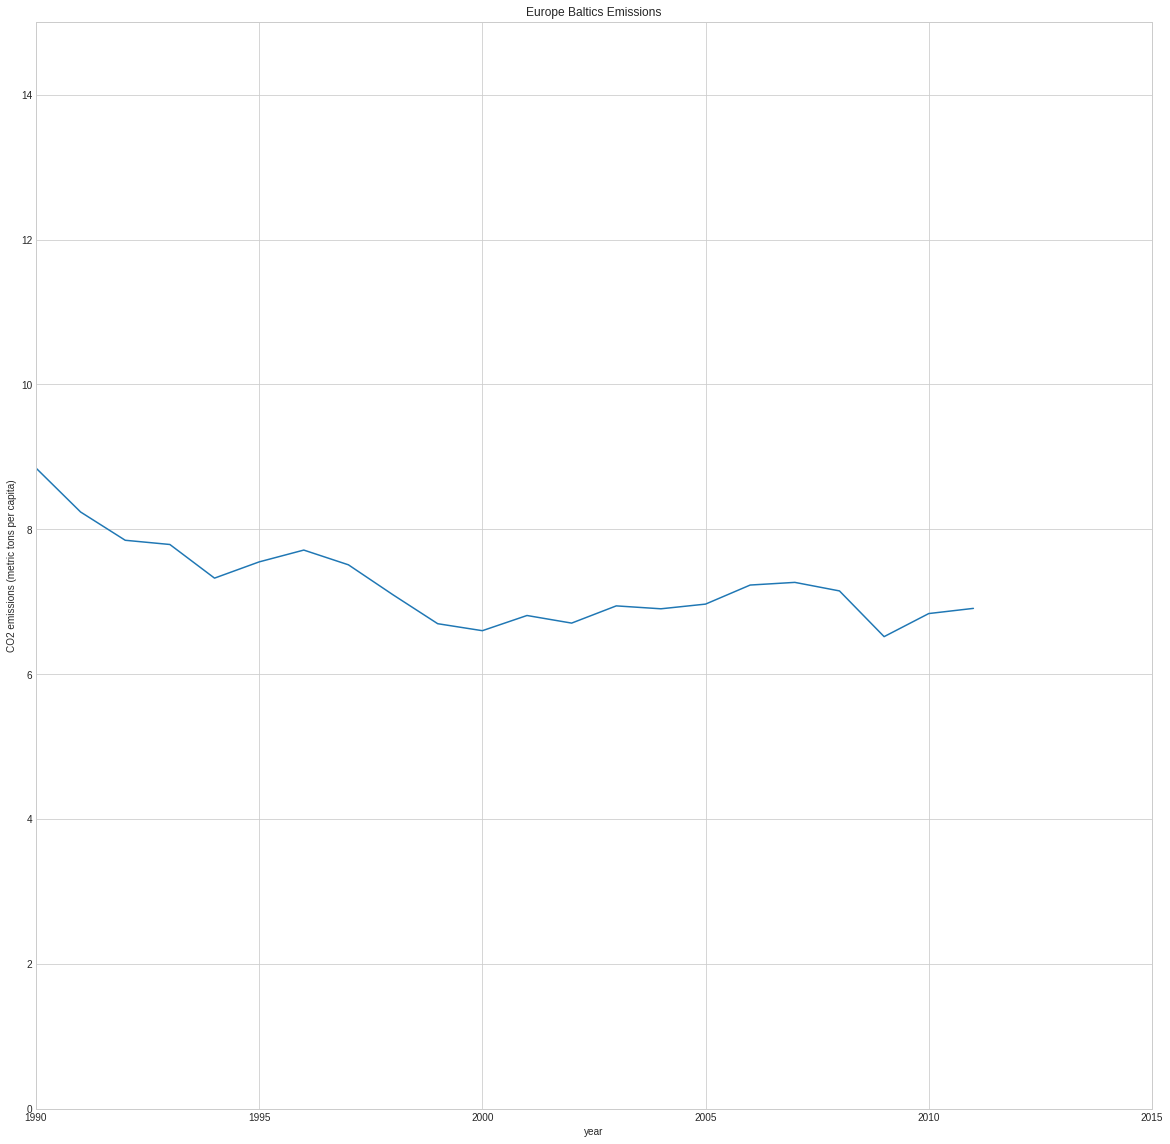

In [53]:
#CEB
#plt.subplot(4,2,3)
plt.figure(figsize = (20,20))
Europe_Baltics = pd.read_sql("""SELECT * FROM Indicators WHERE Year BETWEEN 1990 AND 2011 AND IndicatorCode IN ('EN.ATM.CO2E.PC') AND CountryCode IN ('CEB')""", connect)
sns.lineplot(data = Europe_Baltics, x = 'Year', y = 'Value')
plt.title('Europe Baltics Emissions')
plt.xlabel('year')
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.xlim(1990, 2015)
plt.ylim(0, 15)
plt.show()

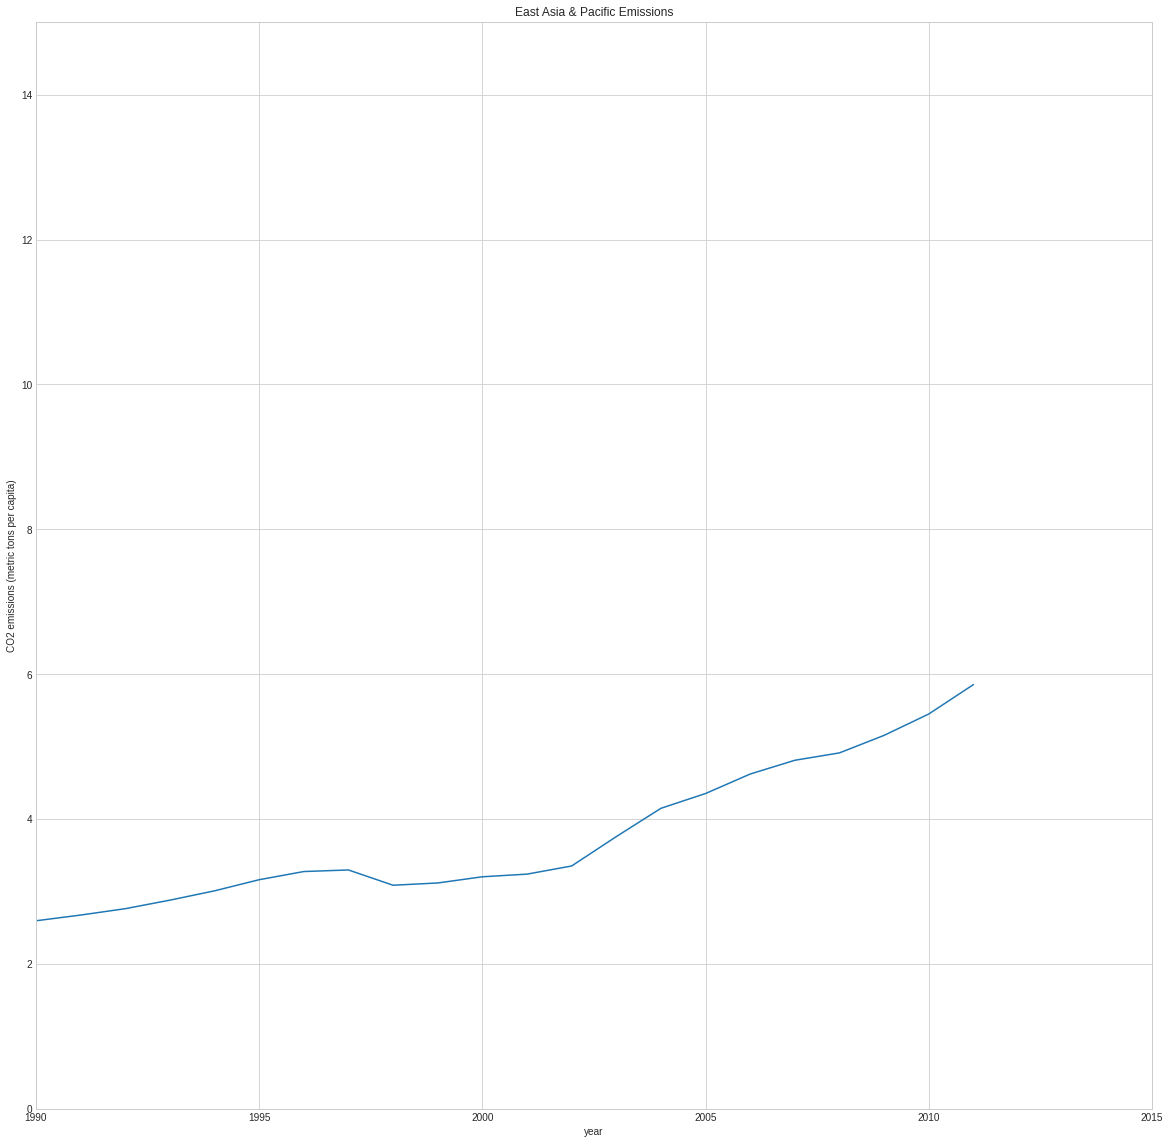

In [54]:
#EAS
#plt.subplot(4,2,4)
plt.figure(figsize = (20,20))
EastAsia_Pacific = pd.read_sql("""SELECT * FROM Indicators WHERE Year BETWEEN 1990 AND 2011 AND IndicatorCode IN ('EN.ATM.CO2E.PC') AND CountryCode IN ('EAS')""", connect)
sns.lineplot(data = EastAsia_Pacific, x = 'Year', y = 'Value')
plt.title('East Asia & Pacific Emissions')
plt.xlabel('year')
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.xlim(1990, 2015)
plt.ylim(0, 15)
plt.show()

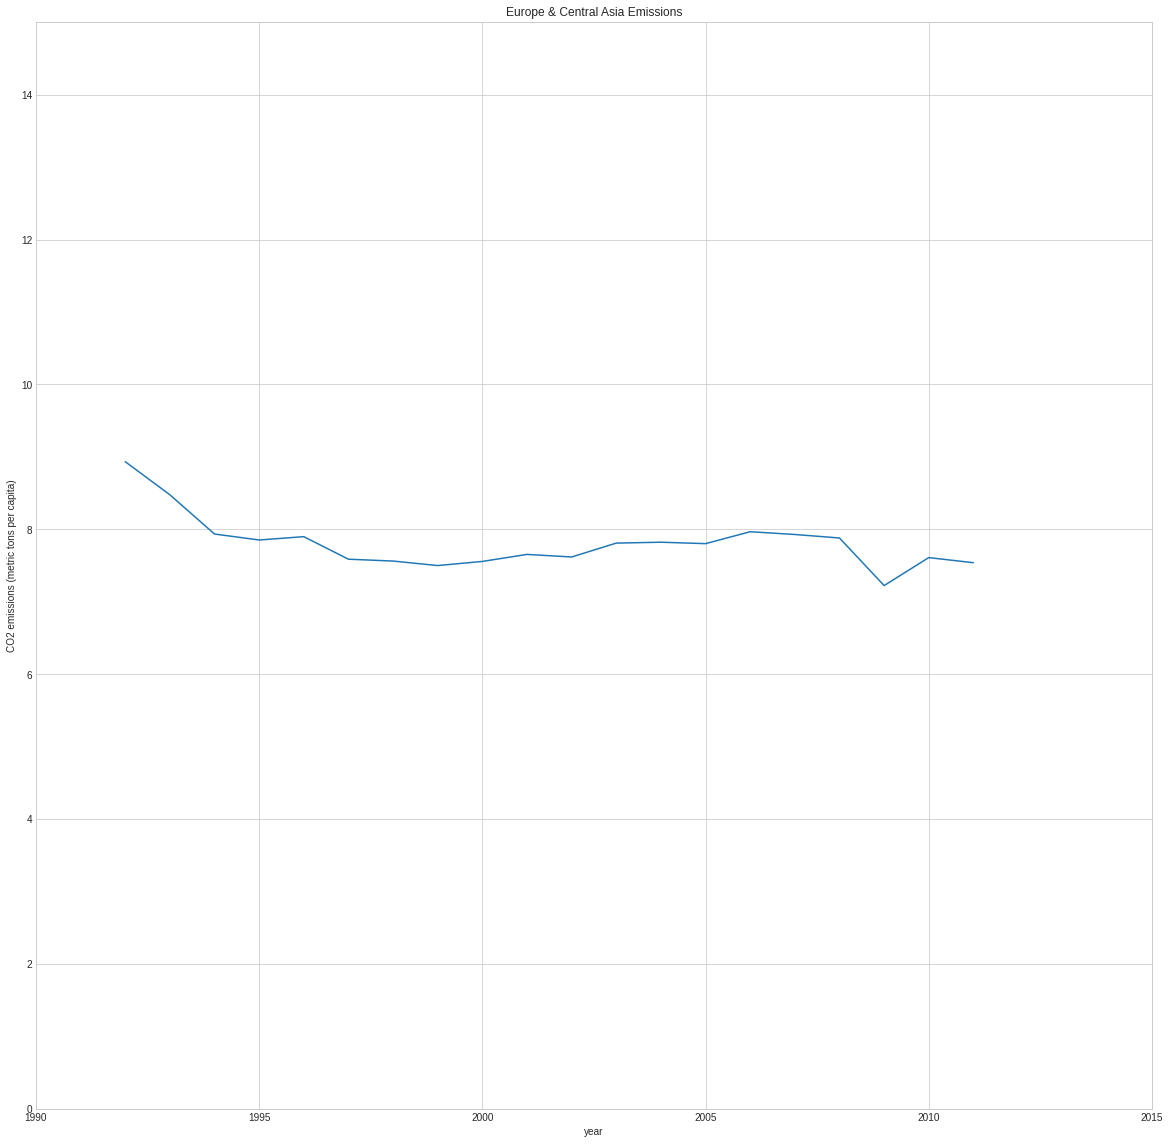

In [55]:
#ECS
#plt.subplot(4,2,5)
plt.figure(figsize = (20,20))
Europe_CentralAsia = pd.read_sql("""SELECT * FROM Indicators WHERE Year BETWEEN 1990 AND 2011 AND IndicatorCode IN ('EN.ATM.CO2E.PC') AND CountryCode IN ('ECS')""", connect)
sns.lineplot(data = Europe_CentralAsia, x = 'Year', y = 'Value')
plt.title('Europe & Central Asia Emissions')
plt.xlabel('year')
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.xlim(1990, 2015)
plt.ylim(0, 15)
plt.show()

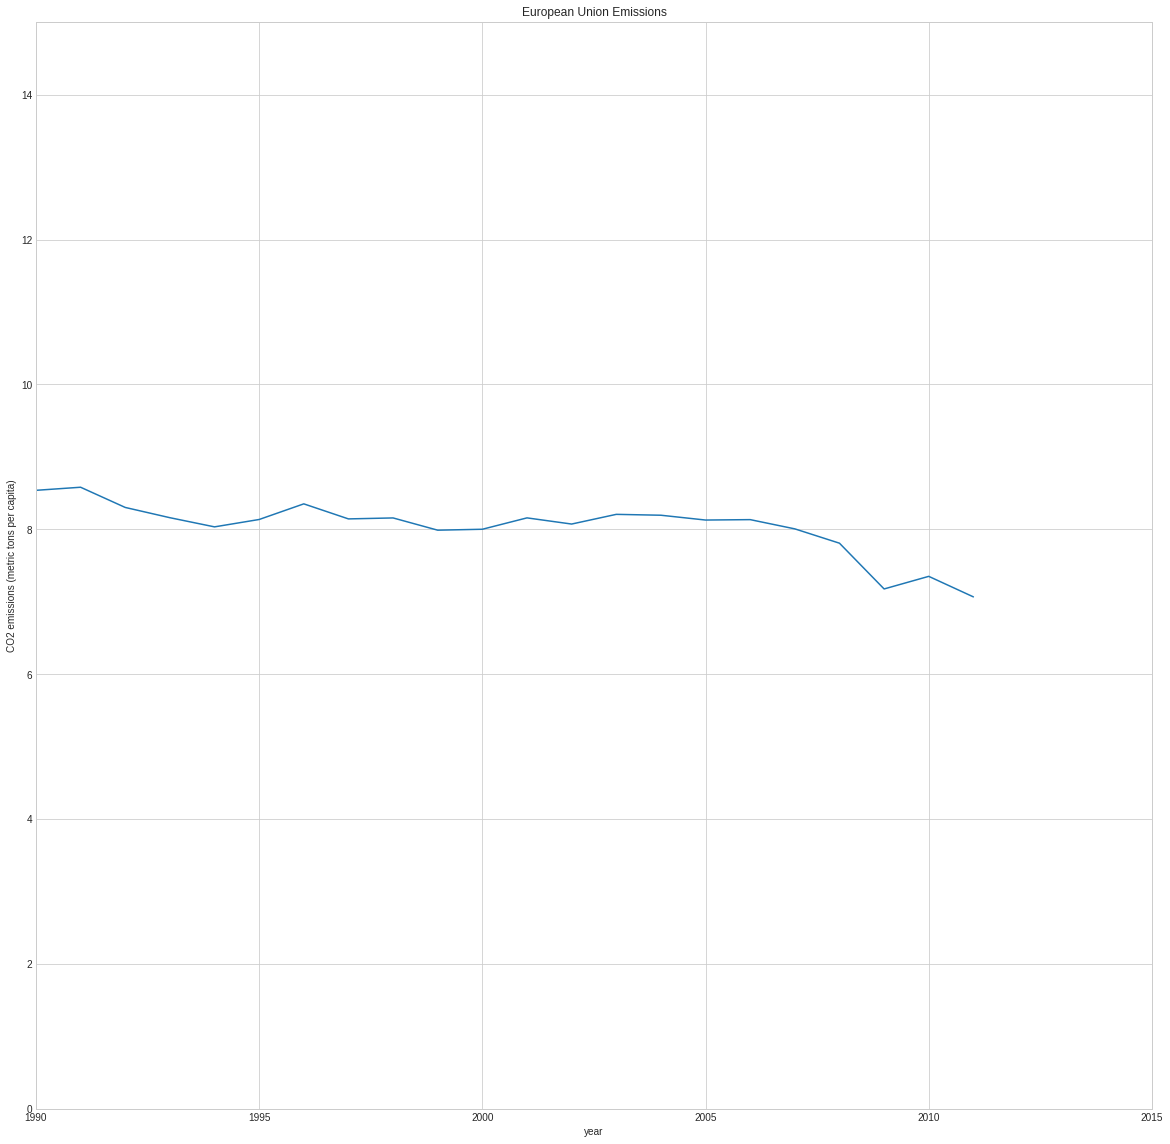

In [56]:
#EUU
#plt.subplot(4,2,6)
plt.figure(figsize = (20,20))
Europe = pd.read_sql("""SELECT * FROM Indicators WHERE Year BETWEEN 1990 AND 2011 AND IndicatorCode IN ('EN.ATM.CO2E.PC') AND CountryCode IN ('EUU')""", connect)
sns.lineplot(data = Europe, x = 'Year', y = 'Value')
plt.title('European Union Emissions')
plt.xlabel('year')
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.xlim(1990, 2015)
plt.ylim(0, 15)
plt.show()

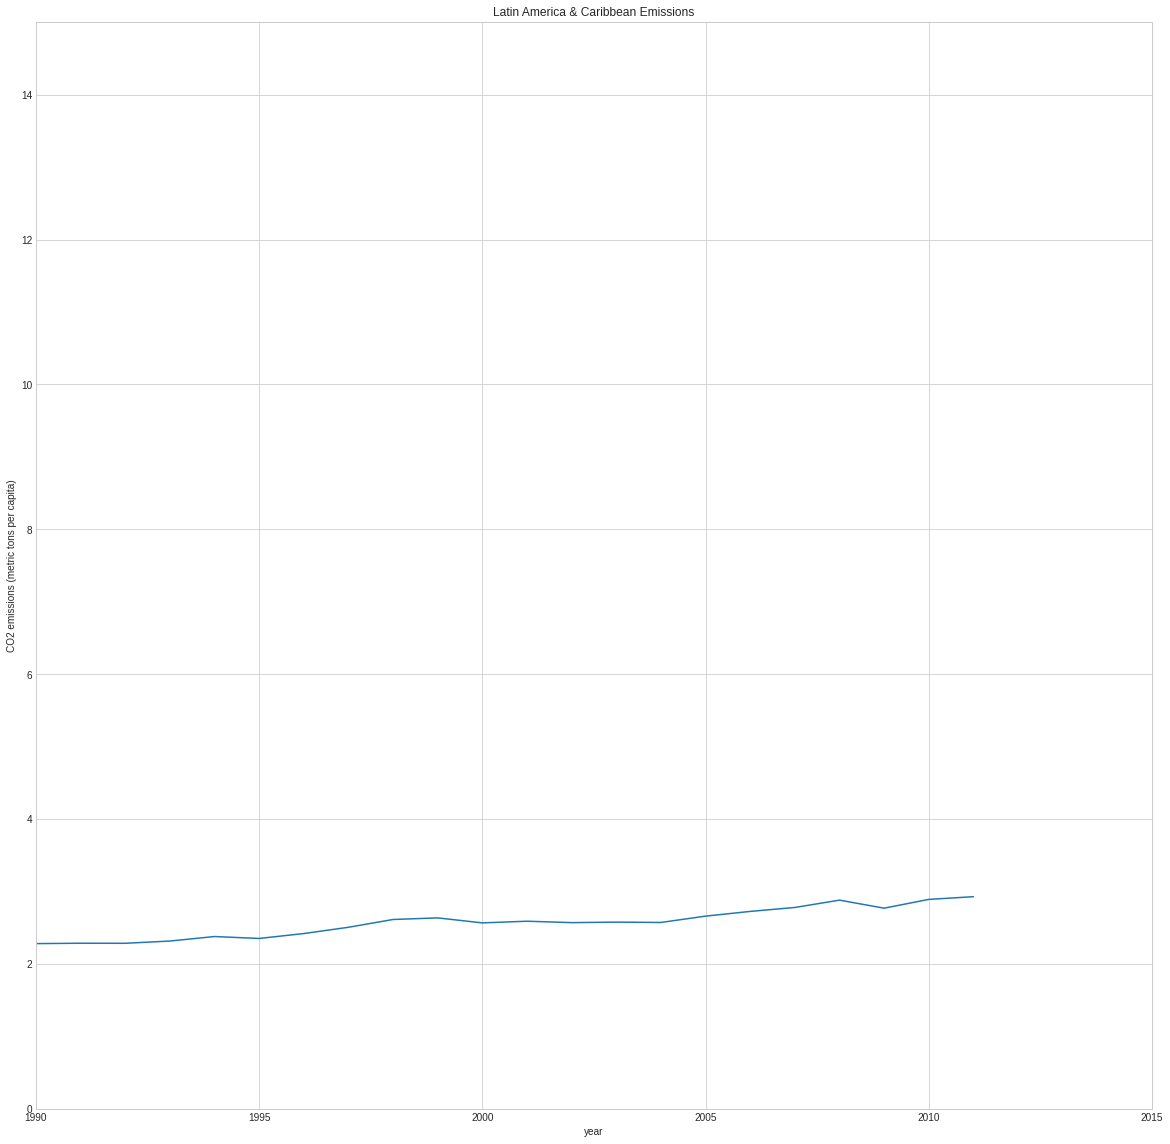

In [57]:
#LCN
#plt.subplot(4,2,7)
plt.figure(figsize = (20,20))
Latin_Caribbean = pd.read_sql("""SELECT * FROM Indicators WHERE Year BETWEEN 1990 AND 2011 AND IndicatorCode IN ('EN.ATM.CO2E.PC') AND CountryCode IN ('LCN')""", connect)
sns.lineplot(data = Latin_Caribbean, x = 'Year', y = 'Value')
plt.title('Latin America & Caribbean Emissions')
plt.xlabel('year')
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.xlim(1990, 2015)
plt.ylim(0, 15)
plt.show()

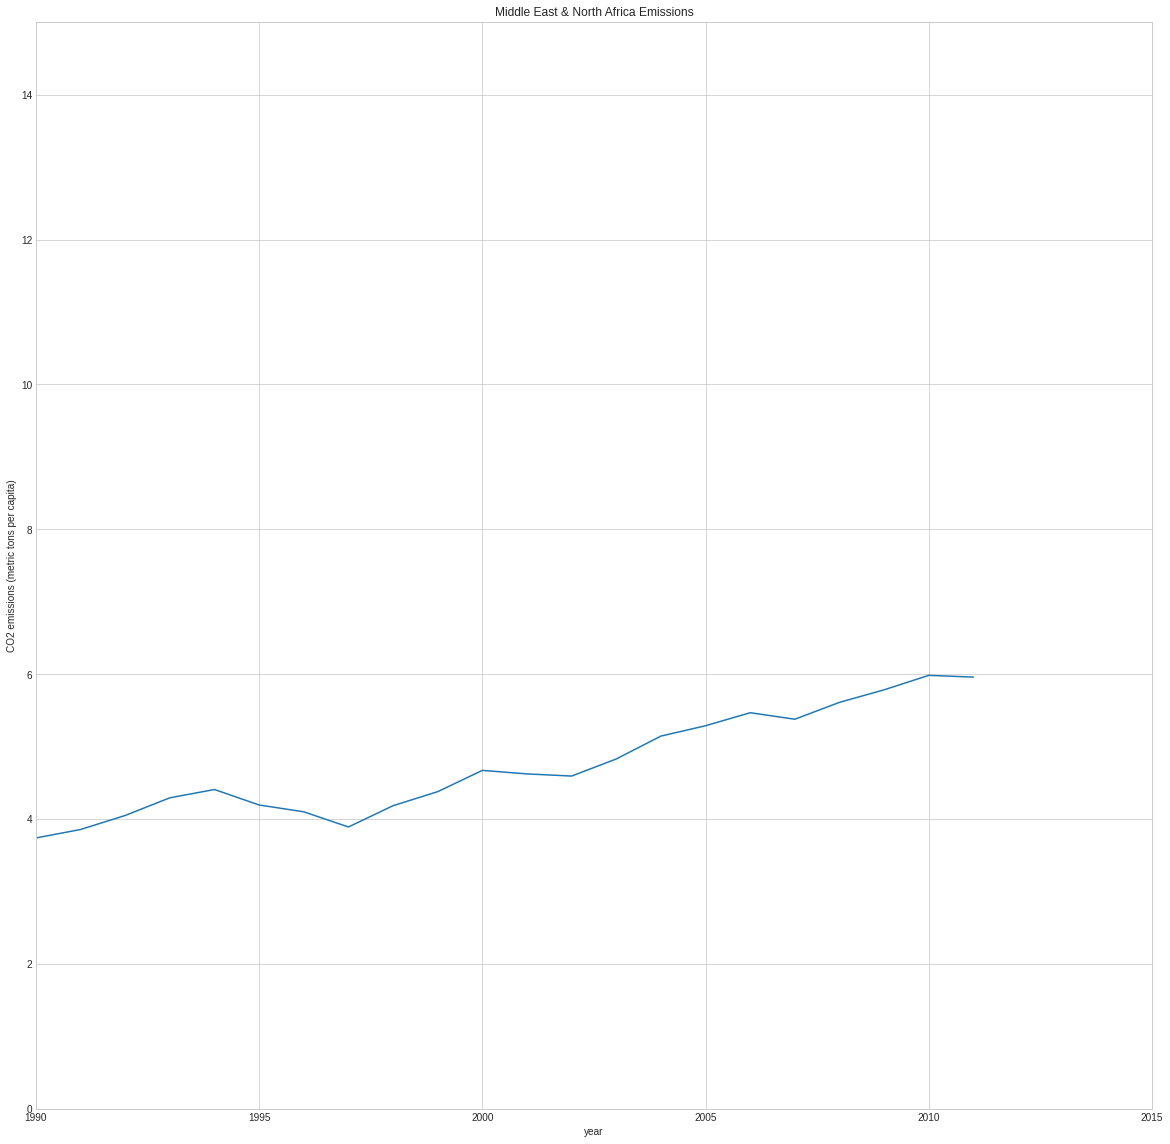

In [58]:
#MEA
#plt.subplot(4,2,8)
plt.figure(figsize = (20,20))
ME_NA = pd.read_sql("""SELECT * FROM Indicators WHERE Year BETWEEN 1990 AND 2011 AND IndicatorCode IN ('EN.ATM.CO2E.PC') AND CountryCode IN ('MEA')""", connect)
sns.lineplot(data = ME_NA, x = 'Year', y = 'Value')
plt.title('Middle East & North Africa Emissions')
plt.xlabel('year')
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.xlim(1990, 2015)
plt.ylim(0, 15)
plt.show()

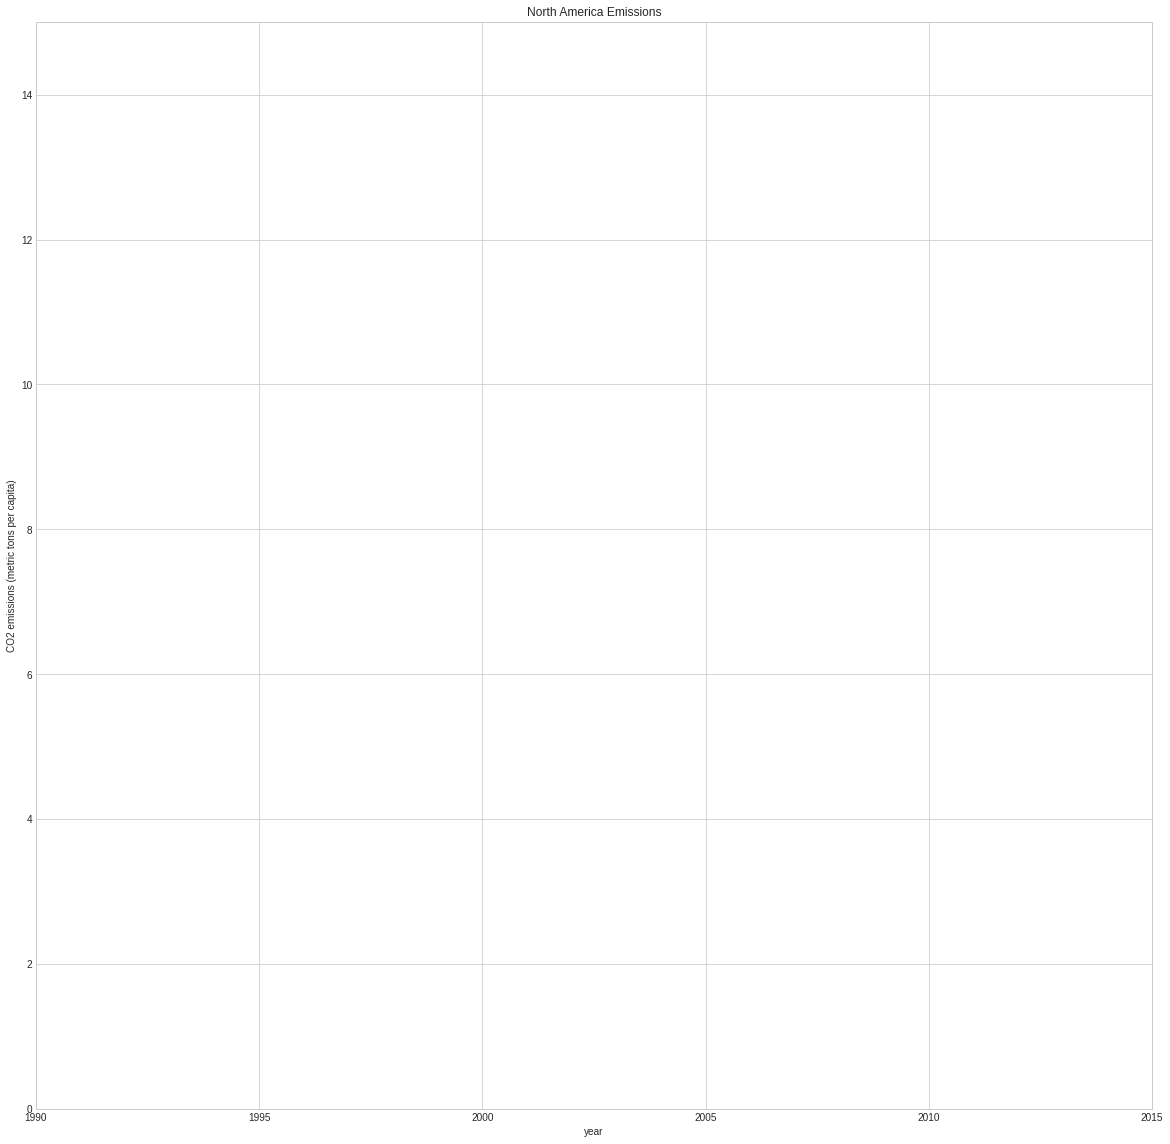

In [68]:
#NAC
#plt.subplot(2,2,1)
plt.figure(figsize = (20,20))
North_Amer = pd.read_sql("""SELECT * FROM Indicators WHERE Year BETWEEN 1990 AND 2011 AND IndicatorCode IN ('EN.ATM.CO2E.PC') AND CountryName IN ('North America')""", connect)
sns.lineplot(data = North_Amer, x = 'Year', y = 'Value')
plt.title('North America Emissions')
plt.xlabel('year')
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.xlim(1990, 2015)
plt.ylim(0, 15)
plt.show()

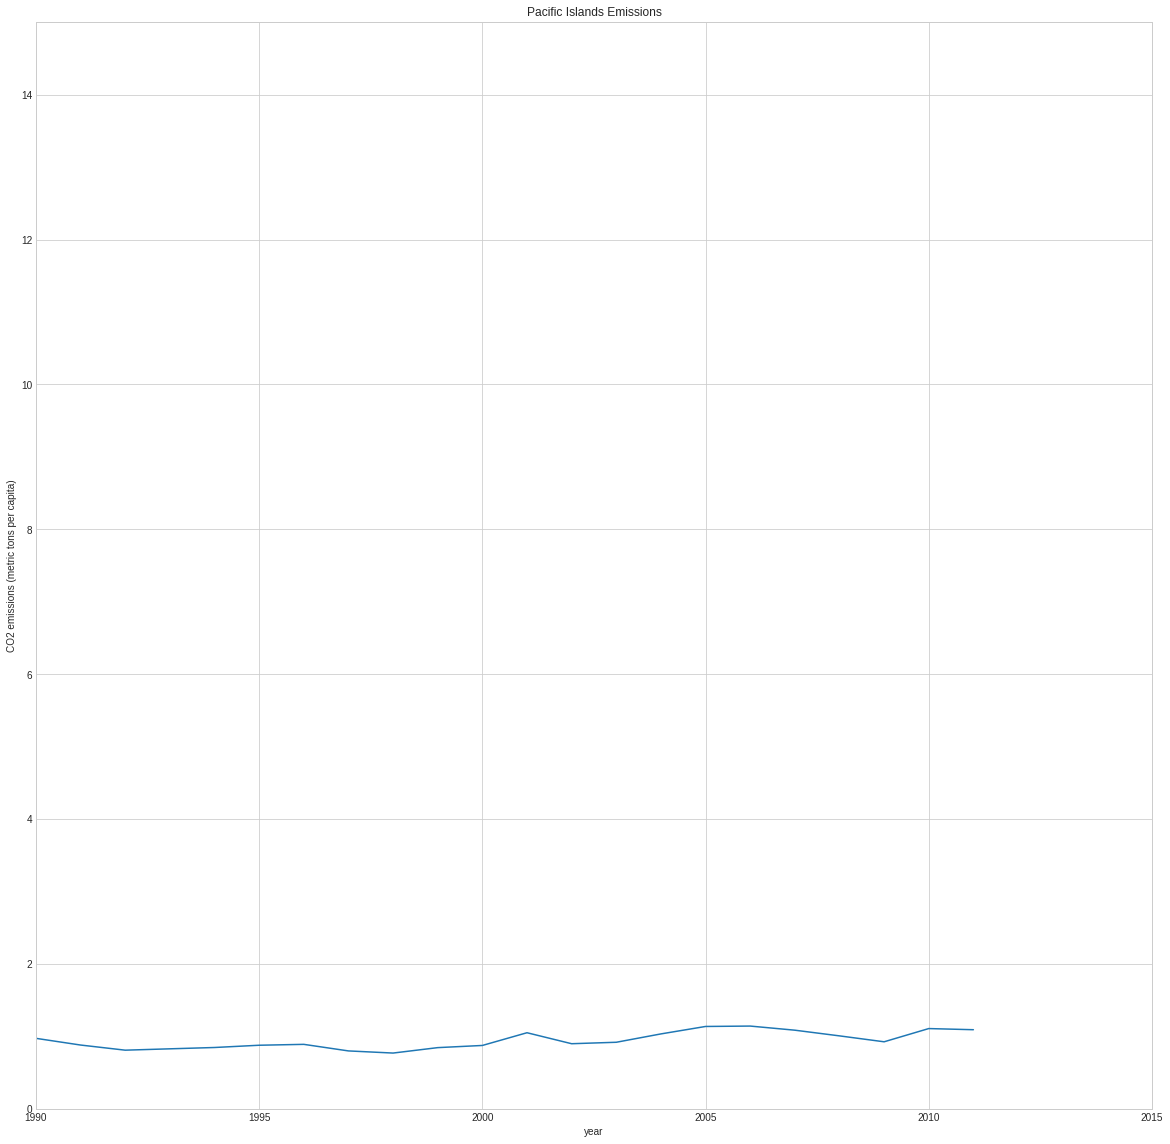

In [60]:
#PSS
#plt.subplot(2,2,2)
plt.figure(figsize = (20,20))
Pacific_Islands = pd.read_sql("""SELECT * FROM Indicators WHERE Year BETWEEN 1990 AND 2011 AND IndicatorCode IN ('EN.ATM.CO2E.PC') AND CountryCode IN ('PSS')""", connect)
sns.lineplot(data = Pacific_Islands, x = 'Year', y = 'Value')
plt.title('Pacific Islands Emissions')
plt.xlabel('year')
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.xlim(1990, 2015)
plt.ylim(0, 15)
plt.show()

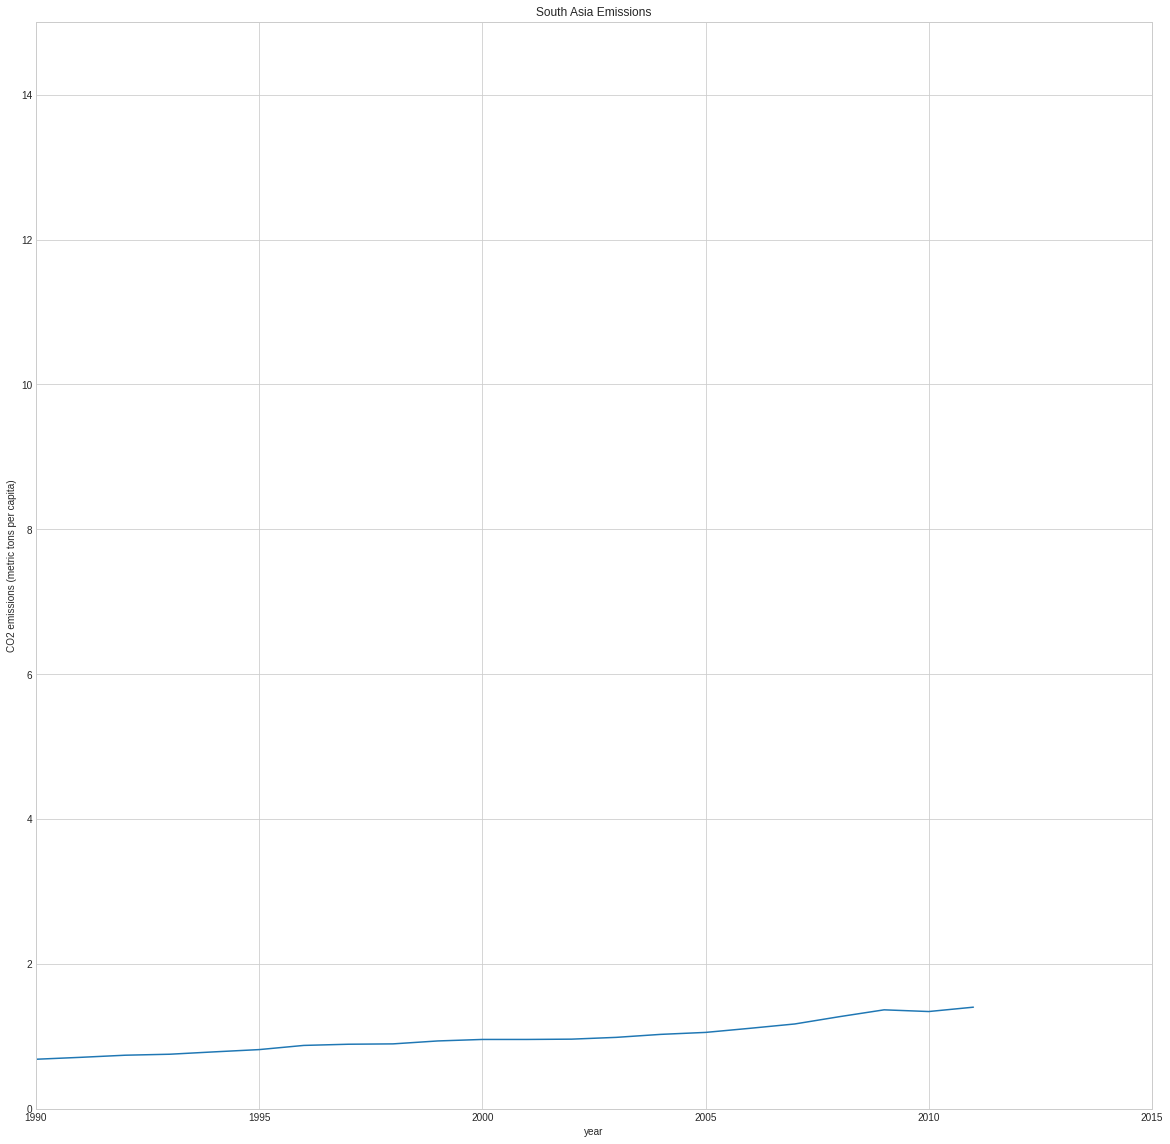

In [61]:
#SAS
#plt.subplot(2,2,3)
plt.figure(figsize = (20,20))
South_Asia = pd.read_sql("""SELECT * FROM Indicators WHERE Year BETWEEN 1990 AND 2011 AND IndicatorCode IN ('EN.ATM.CO2E.PC') AND CountryCode IN ('SAS')""", connect)
sns.lineplot(data = South_Asia, x = 'Year', y = 'Value')
plt.title('South Asia Emissions')
plt.xlabel('year')
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.xlim(1990, 2015)
plt.ylim(0, 15)
plt.show()

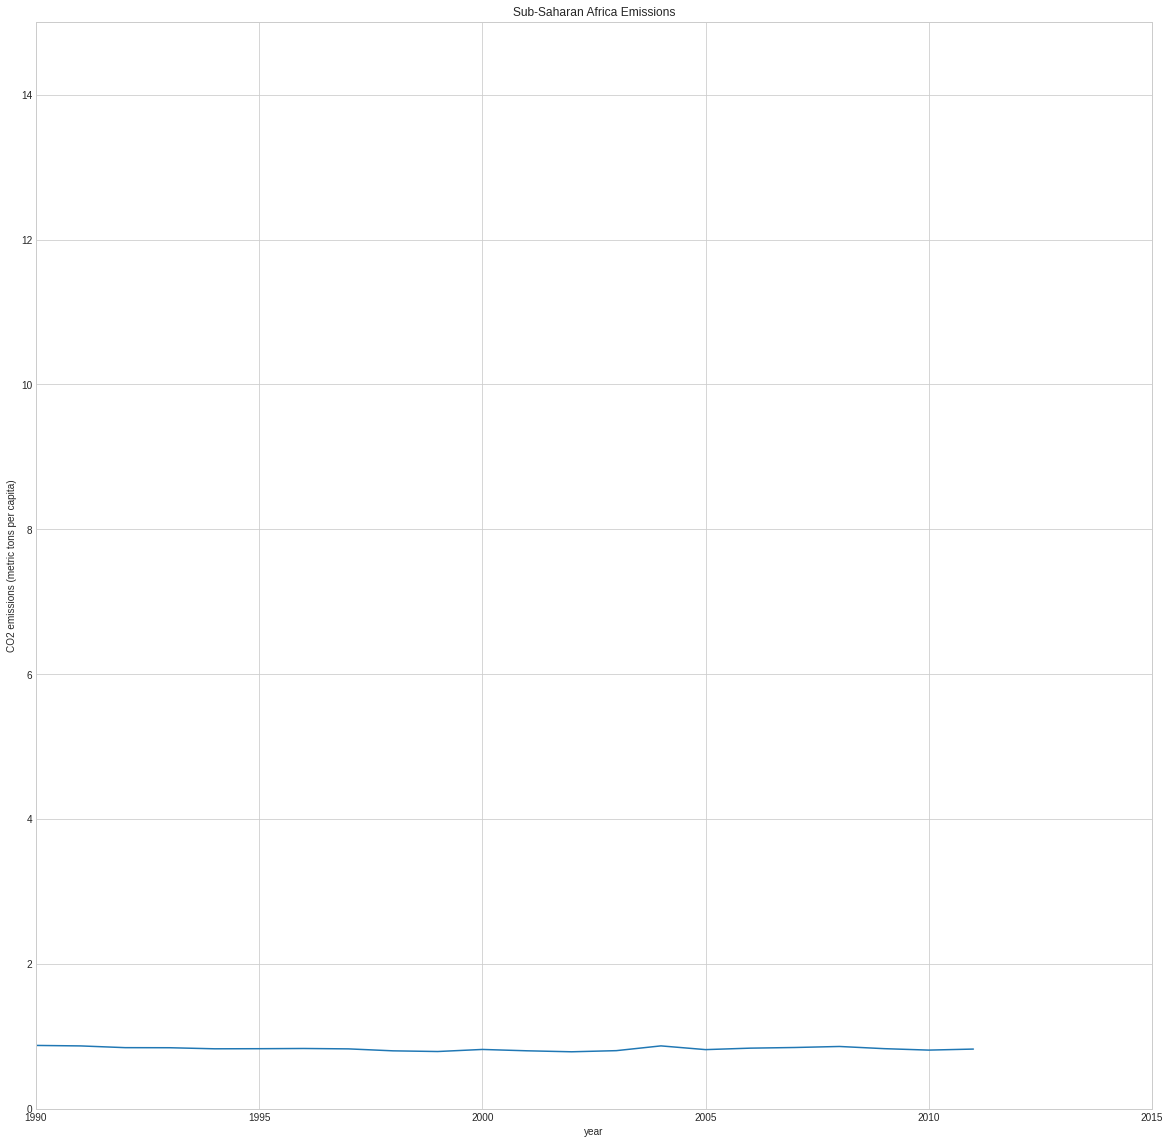

In [62]:
#SSF
#plt.subplot(2,2,4)
plt.figure(figsize = (20,20))
SubSaharan_Africa = pd.read_sql("""SELECT * FROM Indicators WHERE Year BETWEEN 1990 AND 2011 AND IndicatorCode IN ('EN.ATM.CO2E.PC') AND CountryCode IN ('SSF')""", connect)
sns.lineplot(data = SubSaharan_Africa, x = 'Year', y = 'Value')
plt.title('Sub-Saharan Africa Emissions')
plt.xlabel('year')
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.xlim(1990, 2015)
plt.ylim(0, 15)
plt.show()

In [63]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
conn = sqlite3.connect('/kaggle/input/world-development-indicators/database.sqlite')

In [29]:
pd.read_sql(""" SELECT * FROM sqlite_master WHERE type='table';""", conn)

,type,name,tbl_name,rootpage,sql
0,table,Country,Country,2,"CREATE TABLE Country (\n CountryCode TEXT,\..."
1,table,CountryNotes,CountryNotes,186,CREATE TABLE CountryNotes (\n Countrycode T...
2,table,Series,Series,948,"CREATE TABLE Series (\n SeriesCode TEXT,\n ..."
3,table,Indicators,Indicators,4448,CREATE TABLE Indicators (\n CountryName TEX...
4,table,SeriesNotes,SeriesNotes,1317550,CREATE TABLE SeriesNotes (\n Seriescode TEX...
5,table,Footnotes,Footnotes,1317587,CREATE TABLE Footnotes (\n Countrycode TEXT...


In [30]:
pd.read_sql("""SELECT * FROM Indicators LIMIT 10;""", conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [31]:
pd.read_sql("""SELECT CountryName, CountryCode, IndicatorName FROM Indicators;""", conn)

,CountryName,CountryCode,IndicatorName
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo..."
1,Arab World,ARB,Age dependency ratio (% of working-age populat...
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po..."
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ..."
4,Arab World,ARB,Arms exports (SIPRI trend indicator values)
...,...,...,...
5656453,Zimbabwe,ZWE,Time required to register property (days)
5656454,Zimbabwe,ZWE,Time required to start a business (days)
5656455,Zimbabwe,ZWE,Time to prepare and pay taxes (hours)
5656456,Zimbabwe,ZWE,Time to resolve insolvency (years)


In [32]:
pd.read_sql("""SELECT DISTINCT CountryName FROM Indicators;""", conn)

,CountryName
0,Afghanistan
1,Albania
2,Algeria
3,American Samoa
4,Andorra
...,...
242,West Bank and Gaza
243,World
244,"Yemen, Rep."
245,Zambia


In [33]:
pd.read_sql("""SELECT Region, COUNT(*) AS [Count] FROM Country GROUP BY Region ORDER BY 2 DESC;""", conn)

,Region,Count
0,Europe & Central Asia,57
1,Sub-Saharan Africa,48
2,Latin America & Caribbean,41
3,East Asia & Pacific,36
4,,33
5,Middle East & North Africa,21
6,South Asia,8
7,North America,3


In [34]:
pd.read_sql("""SELECT ShortName FROM Country WHERE Region = "Europe & Central Asia";""", conn)

,ShortName
0,Albania
1,Andorra
2,Armenia
3,Austria
4,Azerbaijan
5,Belarus
6,Belgium
7,Bosnia and Herzegovina
8,Bulgaria
9,Channel Islands


In [35]:
datafile = "../input/world-development-indicators/Indicators.csv"
df = pd.read_csv(datafile)
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

df_subset = df.pivot_table(index=['CountryName', 'CountryCode', 'Year'], columns='IndicatorName', values='Value').reset_index()
countries = ['Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Channel Islands', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Faeroe Islands', 'Finland',
            'France', 'Georgia', 'Germany', 'Greece', 'Greenland', 'Hungary', 'Iceland', 'Ireland', 'Isle of Man', 'Italy', 'Kazakhstan', 'Kosovo', 'Kyrgyz Republic', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg',
            'Macedonia', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
            'Tajikstan', 'Turkey', 'Turkmenistan', 'Ukraine', 'United Kingdom', 'Uzbekistan']
# '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''
df_subset1 = df_subset[df_subset['CountryName'].isin(countries)]

fig = px.line(df_subset1, x="Year", y="CO2 emissions (metric tons per capita)", color='CountryName')
fig.update_layout(title='Europe & Central Asia Comparison' , showlegend=True)
fig.show()

In [36]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1990,3.203907
1,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1990,5.367886
2,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1990,8.847908
3,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1990,2.600991
4,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1990,1.803359


In [37]:
pd.read_sql("""SELECT ShortName FROM Country WHERE Region = "Sub-Saharan Africa";""", conn)

,ShortName
0,Angola
1,Benin
2,Botswana
3,Burkina Faso
4,Burundi
5,Cabo Verde
6,Cameroon
7,Central African Republic
8,Chad
9,Comoros


In [38]:
datafile = "../input/world-development-indicators/Indicators.csv"
df = pd.read_csv(datafile)
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

df_subset = df.pivot_table(index=['CountryName', 'CountryCode', 'Year'], columns='IndicatorName', values='Value').reset_index()
countries = ['Angola', 'Benin', 'Botwswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon',
            'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'São Tomé and Principe',
            'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland', 'Tanzania', 'The Gambia', 'Togo', 'Uganda', 'Zambia', 'Zimbabwe']
# '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
df_subset1 = df_subset[df_subset['CountryName'].isin(countries)]

fig = px.line(df_subset1, x="Year", y="CO2 emissions (metric tons per capita)", color='CountryName')
fig.update_layout(title='Sub-Saharan Africa Comparison' , showlegend=True)
fig.show()

In [39]:
pd.read_sql("""SELECT ShortName FROM Country WHERE Region = "Latin America & Caribbean";""", conn)

,ShortName
0,Antigua and Barbuda
1,Argentina
2,Aruba
3,Barbados
4,Belize
5,Bolivia
6,Brazil
7,Cayman Islands
8,Chile
9,Colombia


In [40]:
datafile = "../input/world-development-indicators/Indicators.csv"
df = pd.read_csv(datafile)
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

df_subset = df.pivot_table(index=['CountryName', 'CountryCode', 'Year'], columns='IndicatorName', values='Value').reset_index()
countries = ['Antigua and Barbuda', 'Argentina', 'Aruba', 'Barbados', 'Belize', 'Bolivia', 'Brazil', 'Cayman Islands', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Curaçao', 'Dominica', 'Dominican Republic', 'Ecuador', 'El Salvador',
            'Grenada', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Puerto Rico', 'Sint Maarten (Dutch part)', 'St. Kitts and Nevis', 'St. Lucia', 'St. Martin (French part)', 'St. Vincent and the Grenadines',
            'Suriname', 'The Bahamas', 'Trinidad and Tobago', 'Turks and Caicos Islands', 'Uruguay', 'Venezuela', 'Virgin Islands']
# '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''
df_subset1 = df_subset[df_subset['CountryName'].isin(countries)]

fig = px.line(df_subset1, x="Year", y="CO2 emissions (metric tons per capita)", color='CountryName')
fig.update_layout(title='Latin America & Caribbean Comparison' , showlegend=True)
fig.show()

In [41]:
pd.read_sql("""SELECT ShortName FROM Country WHERE Region = "East Asia & Pacific";""", conn)

,ShortName
0,American Samoa
1,Australia
2,Brunei
3,Cambodia
4,China
5,Dem. People's Rep. Korea
6,Fiji
7,French Polynesia
8,Guam
9,"Hong Kong SAR, China"


In [42]:
datafile = "../input/world-development-indicators/Indicators.csv"
df = pd.read_csv(datafile)
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

df_subset = df.pivot_table(index=['CountryName', 'CountryCode', 'Year'], columns='IndicatorName', values='Value').reset_index()
countries = ['American Samoa', 'Australia', 'Brunei', 'Cambodia', 'China', "Dem. People's Rep. Korea", 'Fiji', 'French Polynesia', 'Guam', 
             'Hong Kong SAR, China', 'Indonesia', 'Japan', 'Kiribati', 'Korea', 'Lao PDR', 'Macao SAR, China', 'Malaysia',
            'Marshall Islands', 'Micronesia', 'Mongolia', 'Myanmar', 'New Caledonia', 'New Zealand', 'Northern Mariana Islands', 'Palau',
             'Papua New Guinea', 'Philippines', 'Samoa', 'Singapore', 'Solomon Islands', 'Thailand', 'Timor-Leste', 'Tonga', 'Tuvalu',
            'Vanuatu', 'Vietnam']
# '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''
df_subset1 = df_subset[df_subset['CountryName'].isin(countries)]

fig = px.line(df_subset1, x="Year", y="CO2 emissions (metric tons per capita)", color='CountryName')
fig.update_layout(title='East Asia & Pacific Comparison' , showlegend=True)
fig.show()

In [43]:
pd.read_sql("""SELECT ShortName FROM Country WHERE Region = "Middle East & North Africa";""", conn)

,ShortName
0,Algeria
1,Bahrain
2,Djibouti
3,Egypt
4,Iran
5,Iraq
6,Israel
7,Jordan
8,Kuwait
9,Lebanon


In [44]:
datafile = "../input/world-development-indicators/Indicators.csv"
df = pd.read_csv(datafile)
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

df_subset = df.pivot_table(index=['CountryName', 'CountryCode', 'Year'], columns='IndicatorName', values='Value').reset_index()
countries = ['Algeria', 'Bahrain', 'Djibouti', 'Egypt', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Libya', 'Malta', 'Morocco', 'Oman', 'Qatar', 
             'Saudi Arabia', 'Syrian Arab Republic', 'Tunisia', 'United Arab Emirates', 'West Bank and Gaza', 'Yemen']
# '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''
df_subset1 = df_subset[df_subset['CountryName'].isin(countries)]

fig = px.line(df_subset1, x="Year", y="CO2 emissions (metric tons per capita)", color='CountryName')
fig.update_layout(title='Middle East & North Africa Comparison' , showlegend=True)
fig.show()

In [45]:
pd.read_sql("""SELECT ShortName FROM Country WHERE Region = "South Asia";""", conn)

,ShortName
0,Afghanistan
1,Bangladesh
2,Bhutan
3,India
4,Maldives
5,Nepal
6,Pakistan
7,Sri Lanka


In [46]:
datafile = "../input/world-development-indicators/Indicators.csv"
df = pd.read_csv(datafile)
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

df_subset = df.pivot_table(index=['CountryName', 'CountryCode', 'Year'], columns='IndicatorName', values='Value').reset_index()
countries = ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']
df_subset1 = df_subset[df_subset['CountryName'].isin(countries)]

fig = px.line(df_subset1, x="Year", y="CO2 emissions (metric tons per capita)", color='CountryName')
fig.update_layout(title='South Asia Comparison' , showlegend=True)
fig.show()

In [47]:
pd.read_sql("""SELECT ShortName FROM Country WHERE Region = "North America";""", conn)

,ShortName
0,Bermuda
1,Canada
2,United States


In [48]:
datafile = "../input/world-development-indicators/Indicators.csv"
df = pd.read_csv(datafile)
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

df_subset = df.pivot_table(index=['CountryName', 'CountryCode', 'Year'], columns='IndicatorName', values='Value').reset_index()
countries = ['Bermuda', 'Canada', 'United States']
df_subset1 = df_subset[df_subset['CountryName'].isin(countries)]

fig = px.line(df_subset1, x="Year", y="CO2 emissions (metric tons per capita)", color='CountryName')
fig.update_layout(title='North America Comparison' , showlegend=True)
fig.show()

In [49]:
datafile = "../input/world-development-indicators/Indicators.csv"
df = pd.read_csv(datafile)
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

df_subset = df.pivot_table(index=['CountryName', 'CountryCode', 'Year'], columns='IndicatorName', values='Value').reset_index()
countries = ['Bermuda', 'Canada', 'United States', 'Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka', 'Algeria', 'Bahrain', 'Djibouti', 'Egypt', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Libya', 'Malta', 'Morocco', 'Oman', 'Qatar', 'Saudi Arabia', 'Syrian Arab Republic', 'Tunisia', 'United Arab Emirates', 'West Bank and Gaza', 'Yemen',
            'American Samoa', 'Australia', 'Brunei', 'Cambodia', 'China', "Dem. People's Rep. Korea", 'Fiji', 'French Polynesia', 'Guam', 
             'Hong Kong SAR, China', 'Indonesia', 'Japan', 'Kiribati', 'Korea', 'Lao PDR', 'Macao SAR, China', 'Malaysia',
            'Marshall Islands', 'Micronesia', 'Mongolia', 'Myanmar', 'New Caledonia', 'New Zealand', 'Northern Mariana Islands', 'Palau',
             'Papua New Guinea', 'Philippines', 'Samoa', 'Singapore', 'Solomon Islands', 'Thailand', 'Timor-Leste', 'Tonga', 'Tuvalu',
            'Vanuatu', 'Vietnam', 'Antigua and Barbuda', 'Argentina', 'Aruba', 'Barbados', 'Belize', 'Bolivia', 'Brazil', 'Cayman Islands', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Curaçao', 'Dominica', 'Dominican Republic', 'Ecuador', 'El Salvador',
            'Grenada', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Puerto Rico', 'Sint Maarten (Dutch part)', 'St. Kitts and Nevis', 'St. Lucia', 'St. Martin (French part)', 'St. Vincent and the Grenadines',
            'Suriname', 'The Bahamas', 'Trinidad and Tobago', 'Turks and Caicos Islands', 'Uruguay', 'Venezuela', 'Virgin Islands',
             'Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Channel Islands', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Faeroe Islands', 'Finland',
            'France', 'Georgia', 'Germany', 'Greece', 'Greenland', 'Hungary', 'Iceland', 'Ireland', 'Isle of Man', 'Italy', 'Kazakhstan', 'Kosovo', 'Kyrgyz Republic', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg',
            'Macedonia', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
            'Tajikstan', 'Turkey', 'Turkmenistan', 'Ukraine', 'United Kingdom', 'Uzbekistan', 'Angola', 'Benin', 'Burundi', 'Burkina Faso', 'Botwswana', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon',
            'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Mozambique', 'Namibia', 'Niger', 'Rwanda', 'São Tomé and Principe',
            'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Sudan', 'Sudan', 'Swaziland', 'Tanzania', 'The Gambia', 'Togo', 'Uganda', 'Zambia', 'Zimbabwe']
df_subset1 = df_subset[df_subset['CountryName'].isin(countries)]

fig = px.line(df_subset1, x="Year", y="CO2 emissions (metric tons per capita)", color='CountryName')
fig.update_layout(title='World Comparison' , showlegend=True)
fig.show()